# Pokemon コンペティション

### コンペ概要
ポケモンの能力値等を示すいくつかの変数からポケモンの対戦結果を予測するコンペです.
(期間: ~ 5/28 23:59)

### 配布データ
- train.csv: 訓練用のデータです. `pokemon.csv`のidに対応しています．
  - First_pokemon: ポケモンのid
  - Second_pokemon: ポケモンのid
  - Winner: 対戦で勝利したポケモンのid
- test.csv: このファイルのデータに対して勝利するポケモンを予測してもらいます.
- pokemon.csv: ポケモンの能力値のデータです． `#` カラムがidを表しています．

### 提出物

test.csvのデータに対して, `First_pokemon` が勝利する確率 `probability` を予測し, 以下のような形式のcsvファイル```submission.csv```を作成してiLect上で提出してください. ただし, 予測値は0以上1以下の値を出力してください.

```
id,probability
0,0.5
1,0.5
...

```

注意点
- 1行目はヘッダーです. 必ず```id,probability```と書いてください.
- 2行目以降は, test.csvのデータの順番と対応させる形でidと予測値を各行に1つずつ出力してください. (idは昇順に並んでいます)
- sample_submission.csvが提出形式のサンプルになので, こちらも参照してみてください.
- **提出前にフォーマットが合っているか必ず確認してください**

### 評価指標
LogLossで評価します.
データ数: N, 真の値: $y$, 予測値: $\hat{y}$ とすると, LogLossは

$$
LogLoss = -\frac{1}{N} \sum_{i=1}^{N}y_i \log(\hat{y_i}) + (1 - y_i) \log(1 - \hat{y_i})
$$

で定義されます.

### 賞金
```
1位: 15,000円
2位: 10,000円
3位: 5,000円
```


# データの観察

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [205]:
data = pd.read_csv('train.csv')
pokemon = pd.read_csv('pokemon.csv')

In [620]:
data.head()

,id,First_pokemon,Second_pokemon,Winner
0,0,88,85,85
1,1,466,408,466
2,2,715,120,715
3,3,467,377,467
4,4,416,206,206


In [5]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [6]:
data.shape

(40000, 4)

In [7]:
wins = np.zeros(len(pokemon))
loses = np.zeros(len(pokemon))
for d in data.values:
    if d[1] == d[3]:
        loses[d[2]-1] += 1
    else:
        loses[d[1]-1] += 1
    wins[d[3]-1] += 1

In [14]:
matches = wins + loses

In [45]:
win_rate = wins / matches

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:1: RuntimeWarning: invalid value encountered in true_divide
  """Entry point for launching an IPython kernel.


In [46]:
win_rate[np.isnan(win_rate)] = 0

In [47]:
win_rate

array([0.28440367, 0.41747573, 0.65789474, 0.54716981, 0.48913043,
       0.55789474, 0.86538462, 0.84070796, 0.85436893, 0.17021277,
       0.36734694, 0.        , 0.56666667, 0.14583333, 0.11538462,
       0.62626263, 0.20731707, 0.13333333, 0.63207547, 0.97802198,
       0.35643564, 0.54639175, 0.87619048, 0.94949495, 0.5       ,
       0.72727273, 0.45454545, 0.81443299, 0.39      , 0.56074766,
       0.65714286, 0.87777778, 0.        , 0.53333333, 0.17894737,
       0.39655172, 0.5483871 , 0.25225225, 0.42574257, 0.57522124,
       0.15384615, 0.42105263, 0.38834951, 0.81081081, 0.11428571,
       0.        , 0.34513274, 0.75471698, 0.06542056, 0.22321429,
       0.34020619, 0.1       , 0.20325203, 0.20833333, 0.68103448,
       0.57142857, 0.82828283, 0.6446281 , 0.84946237, 0.3364486 ,
       0.69892473, 0.5       , 0.77906977, 0.43678161, 0.81521739,
       0.        , 0.70873786, 0.47524752, 0.29032258, 0.62037037,
       0.75438596, 0.79347826, 0.13114754, 0.22916667, 0.40659

In [34]:
non_match_pokemon_idx = np.where(matches==0)[0]
non_match_pokemon_idx

array([ 11,  32,  45,  65,  77,  89, 143, 182, 235, 321, 418, 478, 555,
       617, 654, 781])

In [18]:
test = pd.read_csv('test.csv')

In [19]:
test.head()

,id,First_pokemon,Second_pokemon
0,0,85,602
1,1,536,155
2,2,189,644
3,3,526,166
4,4,690,772


In [36]:
f_p = test.loc[:,['First_pokemon']].values
s_p = test.loc[:,['Second_pokemon']].values

In [40]:
for p in s_p:
    if p in non_match_pokemon_idx+1:
        print(p)

In [41]:
for p in f_p:
    if p in non_match_pokemon_idx+1:
        print(p)

trainデータに載ってないポケモンはtestデータにも登場しない

In [57]:
win_rate_sorted = win_rate.copy()
win_rate_sorted.sort()
win_rate_sorted

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.00970874, 0.01869159, 0.03921569,
       0.04081633, 0.04395604, 0.04545455, 0.04854369, 0.05050505,
       0.05263158, 0.05263158, 0.05882353, 0.06060606, 0.06382979,
       0.06542056, 0.06666667, 0.06730769, 0.07070707, 0.07317073,
       0.07368421, 0.07894737, 0.08080808, 0.08080808, 0.08256881,
       0.08333333, 0.08653846, 0.08823529, 0.0952381 , 0.09734513,
       0.1       , 0.10091743, 0.10309278, 0.10377358, 0.10483871,
       0.10638298, 0.10714286, 0.11      , 0.11009174, 0.11111111,
       0.11340206, 0.11428571, 0.11538462, 0.11650485, 0.11650485,
       0.11711712, 0.12244898, 0.125     , 0.125     , 0.12745098,
       0.13114754, 0.13333333, 0.13414634, 0.13432836, 0.13483146,
       0.13978495, 0.14035088, 0.14049587, 0.14102564, 0.14150

In [58]:
len(matches[matches==0])

16

全勝はなし、全敗が1

In [66]:
np.where((win_rate==0) & (matches!=0))

(array([230]),)

231のポケモンが勝率0（外れ値？）

In [67]:
matches[230]

109.0

これは外れ値でいいだろう

In [73]:
pokemon.iloc[230,:]

#                 231
Name          Shuckle
Type 1            Bug
Type 2           Rock
HP                 20
Attack             10
Defense           230
Sp. Atk            10
Sp. Def           230
Speed               5
Generation          2
Legendary       False
Name: 230, dtype: object

ツボツボ

In [85]:
pokemon.iloc[np.where(win_rate==win_rate.max())[0][0],:]

#                         155
Name          Mega Aerodactyl
Type 1                   Rock
Type 2                 Flying
HP                         80
Attack                    135
Defense                    85
Sp. Atk                    70
Sp. Def                    95
Speed                     150
Generation                  1
Legendary               False
Name: 154, dtype: object

メガプテラ

In [86]:
pokemon.describe()

,#,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation
count,800.0000,800.000000,800.000000,800.000000,800.000000,800.000000,800.000000,800.00000
mean,400.5000,69.258750,79.001250,73.842500,72.820000,71.902500,68.277500,3.32375
std,231.0844,25.534669,32.457366,31.183501,32.722294,27.828916,29.060474,1.66129
min,1.0000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,1.00000
25%,200.7500,50.000000,55.000000,50.000000,49.750000,50.000000,45.000000,2.00000
50%,400.5000,65.000000,75.000000,70.000000,65.000000,70.000000,65.000000,3.00000
75%,600.2500,80.000000,100.000000,90.000000,95.000000,90.000000,90.000000,5.00000
max,800.0000,255.000000,190.000000,230.000000,194.000000,230.000000,180.000000,6.00000


In [87]:
from xgboost.sklearn import XGBClassifier

# データの整形

In [90]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,1,False
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,1,False
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,1,False


In [206]:
pokemon = pd.concat([pokemon, pd.get_dummies(pokemon['Type 1']), pd.get_dummies(pokemon['Type 2'])], axis=1)

In [207]:
pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,Ghost,Grass,Ground,Ice,Normal,Poison,Psychic,Rock,Steel,Water
0,1,Bulbasaur,Grass,Poison,45,49,49,65,65,45,...,0,0,0,0,0,1,0,0,0,0
1,2,Ivysaur,Grass,Poison,60,62,63,80,80,60,...,0,0,0,0,0,1,0,0,0,0
2,3,Venusaur,Grass,Poison,80,82,83,100,100,80,...,0,0,0,0,0,1,0,0,0,0
3,4,Mega Venusaur,Grass,Poison,80,100,123,122,120,80,...,0,0,0,0,0,1,0,0,0,0
4,5,Charmander,Fire,NaN,39,52,43,60,50,65,...,0,0,0,0,0,0,0,0,0,0


In [246]:
pokemon.iloc[4,:]

#                           5
Name               Charmander
Type 1                   Fire
Type 2                    NaN
HP                         39
Attack                     52
Defense                    43
Sp. Atk                    60
Sp. Def                    50
Speed                      65
Generation                  1
Legendary               False
type_1_Bug                  0
type_1_Dark                 0
type_1_Dragon               0
type_1_Electric             0
type_1_Fairy                0
type_1_Fighting             0
type_1_Fire                 1
type_1_Flying               0
type_1_Ghost                0
type_1_Grass                0
type_1_Ground               0
type_1_Ice                  0
type_1_Normal               0
type_1_Poison               0
type_1_Psychic              0
type_1_Rock                 0
type_1_Steel                0
type_1_Water                0
type_2_Bug                  0
type_2_Dark                 0
type_2_Dragon               0
type_2_Ele

In [211]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary', 'Bug', 'Dark', 'Dragon',
       'Electric', 'Fairy', 'Fighting', 'Fire', 'Flying', 'Ghost', 'Grass',
       'Ground', 'Ice', 'Normal', 'Poison', 'Psychic', 'Rock', 'Steel',
       'Water', 'Bug', 'Dark', 'Dragon', 'Electric', 'Fairy', 'Fighting',
       'Fire', 'Flying', 'Ghost', 'Grass', 'Ground', 'Ice', 'Normal', 'Poison',
       'Psychic', 'Rock', 'Steel', 'Water'],
      dtype='object')

In [228]:
pokemon.columns = np.concatenate((pokemon.columns[:12],  'type_1_' + pokemon.columns[12:30].values, 'type_2_' + pokemon.columns[30:].values))

In [229]:
pokemon.columns

Index(['#', 'Name', 'Type 1', 'Type 2', 'HP', 'Attack', 'Defense', 'Sp. Atk',
       'Sp. Def', 'Speed', 'Generation', 'Legendary', 'type_1_Bug',
       'type_1_Dark', 'type_1_Dragon', 'type_1_Electric', 'type_1_Fairy',
       'type_1_Fighting', 'type_1_Fire', 'type_1_Flying', 'type_1_Ghost',
       'type_1_Grass', 'type_1_Ground', 'type_1_Ice', 'type_1_Normal',
       'type_1_Poison', 'type_1_Psychic', 'type_1_Rock', 'type_1_Steel',
       'type_1_Water', 'type_2_Bug', 'type_2_Dark', 'type_2_Dragon',
       'type_2_Electric', 'type_2_Fairy', 'type_2_Fighting', 'type_2_Fire',
       'type_2_Flying', 'type_2_Ghost', 'type_2_Grass', 'type_2_Ground',
       'type_2_Ice', 'type_2_Normal', 'type_2_Poison', 'type_2_Psychic',
       'type_2_Rock', 'type_2_Steel', 'type_2_Water'],
      dtype='object')

In [230]:
data.head()

,id,First_pokemon,Second_pokemon,Winner
0,0,88,85,85
1,1,466,408,466
2,2,715,120,715
3,3,467,377,467
4,4,416,206,206


In [232]:
winner = []
for d in data.values:
    if d[3] == d[1]:
        winner.append(0)
    else:
        winner.append(1)
winner = pd.DataFrame({'winner': winner})

In [514]:
X = data.copy().drop('Winner', axis=1)
X.head()

,id,First_pokemon,Second_pokemon
0,0,88,85
1,1,466,408
2,2,715,120
3,3,467,377
4,4,416,206


In [234]:
first_pokemon = pd.DataFrame(columns=pokemon.columns)
second_pokemon = pd.DataFrame(columns=pokemon.columns)
for d in data.values:
    first_pokemon = first_pokemon.append(pokemon.iloc[d[1]-1,:])
    second_pokemon = second_pokemon.append(pokemon.iloc[d[2]-1,:])

In [515]:
print(first_pokemon.shape)
print(second_pokemon.shape)
print(X.shape)

(40000, 48)
(40000, 48)
(40000, 3)


In [236]:
first_pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,type_2_Ghost,type_2_Grass,type_2_Ground,type_2_Ice,type_2_Normal,type_2_Poison,type_2_Psychic,type_2_Rock,type_2_Steel,type_2_Water
87,88,Mega Slowbro,Water,Psychic,95,75,180,130,80,30,...,0,0,0,0,0,0,1,0,0,0
465,466,Buizel,Water,NaN,55,65,35,60,30,85,...,0,0,0,0,0,0,0,0,0,0
714,715,Keldeo Resolute Forme,Water,Fighting,91,72,90,129,90,108,...,0,0,0,0,0,0,0,0,0,0
466,467,Floatzel,Water,NaN,85,105,55,85,50,115,...,0,0,0,0,0,0,0,0,0,0
415,416,Regice,Ice,NaN,80,50,100,100,200,50,...,0,0,0,0,0,0,0,0,0,0


In [237]:
second_pokemon.head()

,#,Name,Type 1,Type 2,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,...,type_2_Ghost,type_2_Grass,type_2_Ground,type_2_Ice,type_2_Normal,type_2_Poison,type_2_Psychic,type_2_Rock,type_2_Steel,type_2_Water
84,85,Rapidash,Fire,NaN,65,100,70,80,80,105,...,0,0,0,0,0,0,0,0,0,0
407,408,Shelgon,Dragon,NaN,65,95,100,60,50,50,...,0,0,0,0,0,0,0,0,0,0
119,120,Rhyhorn,Ground,Rock,80,85,95,30,30,25,...,0,0,0,0,0,0,0,1,0,0
376,377,Claydol,Ground,Psychic,60,70,105,70,120,75,...,0,0,0,0,0,0,1,0,0,0
205,206,Aipom,Normal,NaN,55,70,55,40,55,85,...,0,0,0,0,0,0,0,0,0,0


In [238]:
first_pokemon.columns = 'first_' + first_pokemon.columns
second_pokemon.columns = 'second_' + second_pokemon.columns

In [516]:
X = pd.concat([X, first_pokemon.reset_index(drop=True), second_pokemon.reset_index(drop=True)], axis=1)

In [517]:
X.iloc[0,:]

id                                   0
First_pokemon                       88
Second_pokemon                      85
first_#                             88
first_Name                Mega Slowbro
first_Type 1                     Water
first_Type 2                   Psychic
first_HP                            95
first_Attack                        75
first_Defense                      180
first_Sp. Atk                      130
first_Sp. Def                       80
first_Speed                         30
first_Generation                     1
first_Legendary                  False
first_type_1_Bug                     0
first_type_1_Dark                    0
first_type_1_Dragon                  0
first_type_1_Electric                0
first_type_1_Fairy                   0
first_type_1_Fighting                0
first_type_1_Fire                    0
first_type_1_Flying                  0
first_type_1_Ghost                   0
first_type_1_Grass                   0
first_type_1_Ground      

In [518]:
X.head()

,id,First_pokemon,Second_pokemon,first_#,first_Name,first_Type 1,first_Type 2,first_HP,first_Attack,first_Defense,...,second_type_2_Ghost,second_type_2_Grass,second_type_2_Ground,second_type_2_Ice,second_type_2_Normal,second_type_2_Poison,second_type_2_Psychic,second_type_2_Rock,second_type_2_Steel,second_type_2_Water
0,0,88,85,88,Mega Slowbro,Water,Psychic,95,75,180,...,0,0,0,0,0,0,0,0,0,0
1,1,466,408,466,Buizel,Water,NaN,55,65,35,...,0,0,0,0,0,0,0,0,0,0
2,2,715,120,715,Keldeo Resolute Forme,Water,Fighting,91,72,90,...,0,0,0,0,0,0,0,1,0,0
3,3,467,377,467,Floatzel,Water,NaN,85,105,55,...,0,0,0,0,0,0,1,0,0,0
4,4,416,206,416,Regice,Ice,NaN,80,50,100,...,0,0,0,0,0,0,0,0,0,0


In [519]:
X = X.drop('first_Type 1', axis=1).drop('first_Type 2', axis=1).drop('second_Type 1', axis=1).drop('second_Type 2', axis=1)

In [520]:
X.columns

Index(['id', 'First_pokemon', 'Second_pokemon', 'first_#', 'first_Name',
       'first_HP', 'first_Attack', 'first_Defense', 'first_Sp. Atk',
       'first_Sp. Def', 'first_Speed', 'first_Generation', 'first_Legendary',
       'first_type_1_Bug', 'first_type_1_Dark', 'first_type_1_Dragon',
       'first_type_1_Electric', 'first_type_1_Fairy', 'first_type_1_Fighting',
       'first_type_1_Fire', 'first_type_1_Flying', 'first_type_1_Ghost',
       'first_type_1_Grass', 'first_type_1_Ground', 'first_type_1_Ice',
       'first_type_1_Normal', 'first_type_1_Poison', 'first_type_1_Psychic',
       'first_type_1_Rock', 'first_type_1_Steel', 'first_type_1_Water',
       'first_type_2_Bug', 'first_type_2_Dark', 'first_type_2_Dragon',
       'first_type_2_Electric', 'first_type_2_Fairy', 'first_type_2_Fighting',
       'first_type_2_Fire', 'first_type_2_Flying', 'first_type_2_Ghost',
       'first_type_2_Grass', 'first_type_2_Ground', 'first_type_2_Ice',
       'first_type_2_Normal', 'first_type

In [521]:
X['first_Legendary'] = X['first_Legendary'].map({False: 0, True: 1})
X['second_Legendary'] = X['second_Legendary'].map({False: 0, True: 1})

In [522]:
X = X.drop('first_Name', axis=1).drop('second_Name', axis=1)

In [523]:
X.iloc[0,:]

id                          0
First_pokemon              88
Second_pokemon             85
first_#                    88
first_HP                   95
first_Attack               75
first_Defense             180
first_Sp. Atk             130
first_Sp. Def              80
first_Speed                30
first_Generation            1
first_Legendary             0
first_type_1_Bug            0
first_type_1_Dark           0
first_type_1_Dragon         0
first_type_1_Electric       0
first_type_1_Fairy          0
first_type_1_Fighting       0
first_type_1_Fire           0
first_type_1_Flying         0
first_type_1_Ghost          0
first_type_1_Grass          0
first_type_1_Ground         0
first_type_1_Ice            0
first_type_1_Normal         0
first_type_1_Poison         0
first_type_1_Psychic        0
first_type_1_Rock           0
first_type_1_Steel          0
first_type_1_Water          1
                         ... 
second_type_1_Fire          1
second_type_1_Flying        0
second_typ

In [524]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaler.fit(X)
X_std = scaler.transform(X)

In [363]:
y = winner.values.ravel()
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_std, y, test_size=0.2, random_state=0)

In [364]:
y.shape

(40000,)

# 学習

In [265]:
from sklearn.metrics import log_loss

## random forest

In [266]:
from sklearn.ensemble import RandomForestClassifier
random_forest = RandomForestClassifier(n_estimators=1000)
random_forest.fit(X_train, y_train)

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [267]:
log_loss(y_test, random_forest.predict(X_test))

2.111206695061822

In [271]:
random_forest.score(X_test, y_test)

0.938875

In [269]:
from sklearn.ensemble import RandomForestRegressor
rfr = RandomForestRegressor(n_estimators=1000)
rfr.fit(X_train, y_train)

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [432]:
log_loss(y_test, rfr.predict(X_test))

0.09853914698934109

## xgboost

In [243]:
from xgboost.sklearn import XGBClassifier

In [484]:
xgb = XGBClassifier()
xgb.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='binary:logistic', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [485]:
xgb.score(X_test, y_test)

0.928

In [486]:
from xgboost.sklearn import XGBRegressor
xgr = XGBRegressor()
xgr.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='reg:linear', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [487]:
log_loss(y_test, xgr.predict(X_test))

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/metrics/classification.py:1694: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/metrics/classification.py:1694: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


nan

## ニューラルネットワーク

In [272]:
import chainer
import chainer.functions as F           # パラメータを含まない関数を収録したパッケージ
import chainer.links as L               # パラメータを含む関数を収録したパッケージ
from chainer import computational_graph # グラフを出力するパッケージ
from chainer import serializers         # モデルの保存や読込を行うパッケージ

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


In [365]:
class MLP(chainer.Chain):
    def __init__(self):
        super(MLP, self).__init__()
        with self.init_scope():
            self.l1=L.Linear(93, 500)
            self.l2=L.Linear(500, 800)
            self.l3=L.Linear(800, 300)
            self.l4=L.Linear(300, 2)
        
    def __call__(self, X):
        h1 = F.relu(self.l1(X))
        h2 = F.relu(self.l2(h1))
        h3 = F.relu(self.l3(h2))
        return self.l4(h3)

In [366]:
model = L.Classifier(MLP())
gpu = -1 

if gpu >= 0:
    xp = cuda.cupy
    cupy.cuda.Device(gpu).use()
    model.to_gpu()
else:
    xp = np

# # データをxpの32bit小数の型に変換
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
# # 数値をChainerが扱える型に変換
X_chain = X_std.astype(xp.float32)
y_chain = y.astype(xp.int32)

optimizer = chainer.optimizers.Adam(alpha=0.001, beta1=0.9, beta2=0.999, eps=1e-08)
optimizer.setup(model) 

batch_size = 100
n_epoch = 20

In [367]:
X_chain

array([[-1.7320075 , -1.3577675 , -1.379765  , ..., -0.13471636,
        -0.16482903, -0.13316913],
       [-1.731921  ,  0.28802356,  0.02280876, ..., -0.13471636,
        -0.16482903, -0.13316913],
       [-1.7318343 ,  1.3721558 , -1.2277833 , ...,  7.4230037 ,
        -0.16482903, -0.13316913],
       ...,
       [ 1.7318343 ,  1.2067059 ,  0.10097077, ..., -0.13471636,
        -0.16482903, -0.13316913],
       [ 1.731921  , -1.7147909 ,  0.94772583, ..., -0.13471636,
        -0.16482903, -0.13316913],
       [ 1.7320075 ,  0.19659072,  0.7392938 , ..., -0.13471636,
        -0.16482903, -0.13316913]], dtype=float32)

In [368]:
y_chain.shape

(40000,)

In [369]:
X_chain_train, X_chain_test, y_chain_train, y_chain_test = train_test_split(X_chain, y_chain, test_size=0.2, random_state=0)

In [370]:
from chainer.datasets import tuple_dataset
from chainer import iterators, training
from chainer.training import extensions

In [371]:
train = tuple_dataset.TupleDataset(X_chain_train, y_chain_train)
train_iter = iterators.SerialIterator(train, batch_size=batch_size, shuffle=True)
updater = training.StandardUpdater(train_iter, optimizer, device=gpu)
trainer = training.Trainer(updater, (n_epoch,'epoch'), out='result')
test = tuple_dataset.TupleDataset(X_chain_test,y_chain_test)
test_iter = iterators.SerialIterator(test, batch_size=batch_size ,shuffle=False, repeat=False)
trainer.extend(extensions.Evaluator(test_iter, model))
trainer.extend(extensions.LogReport())
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'main/accuracy', 'validation/main/loss','validation/main/accuracy']))
# trainとtestの精度のグラフを出力
trainer.extend(extensions.PlotReport(['main/accuracy', 'validation/main/accuracy'],
                          'epoch', file_name='accuracy.png'))
# trainとtestの損失関数のグラフを出力
trainer.extend(extensions.PlotReport(['main/loss', 'validation/main/loss'],
                          'epoch', file_name='loss.png'))
trainer.extend(extensions.ProgressBar())

In [372]:
trainer.run()

epoch       main/loss   main/accuracy  validation/main/loss  validation/main/accuracy
     total [..................................................]  1.56%
this epoch [###############...................................] 31.25%
       100 iter, 0 epoch / 20 epochs
       inf iters/sec. Estimated time to finish: 0:00:00.
     total [#.................................................]  3.12%
this epoch [###############################...................] 62.50%
       200 iter, 0 epoch / 20 epochs
    88.518 iters/sec. Estimated time to finish: 0:01:10.042017.
     total [##................................................]  4.69%
this epoch [##############################################....] 93.75%
       300 iter, 0 epoch / 20 epochs
    89.402 iters/sec. Estimated time to finish: 0:01:08.231430.
1           0.345025    0.858563       0.219729              0.91775                   
     total [###...............................................]  6.25%
this epoch [############.........

     total [########################..........................] 48.44%
this epoch [##################################................] 68.75%
      3100 iter, 9 epoch / 20 epochs
    56.972 iters/sec. Estimated time to finish: 0:00:57.923065.
10          0.0314705   0.988438       0.162428              0.9525                    
     total [#########################.........................] 50.00%
this epoch [..................................................]  0.00%
      3200 iter, 10 epoch / 20 epochs
    56.448 iters/sec. Estimated time to finish: 0:00:56.689221.
     total [#########################.........................] 51.56%
this epoch [###############...................................] 31.25%
      3300 iter, 10 epoch / 20 epochs
    56.494 iters/sec. Estimated time to finish: 0:00:54.872896.
     total [##########################........................] 53.12%
this epoch [###############################...................] 62.50%
      3400 iter, 10 epoch / 20 epochs
 

19          0.0254953   0.991469       0.153288              0.9585                    
     total [###############################################...] 95.31%
this epoch [###...............................................]  6.25%
      6100 iter, 19 epoch / 20 epochs
    52.563 iters/sec. Estimated time to finish: 0:00:05.707395.
     total [################################################..] 96.88%
this epoch [##################................................] 37.50%
      6200 iter, 19 epoch / 20 epochs
    52.485 iters/sec. Estimated time to finish: 0:00:03.810589.
     total [#################################################.] 98.44%
this epoch [##################################................] 68.75%
      6300 iter, 19 epoch / 20 epochs
    52.429 iters/sec. Estimated time to finish: 0:00:01.907333.
20          0.0188704   0.993875       0.167729              0.957125                  
     total [##################################################] 100.00%
this epoch [........

In [407]:
# ReportPlotによるグラフを出力する関数
from pylab import box
def show_graph(src):
    img =  plt.imread(src)
    xpixels,ypixels = img.shape[0],img.shape[1]
    dpi = 100
    margin = 0.01
    figsize = (1 + margin) * ypixels / dpi, (1 + margin) * xpixels / dpi

    fig = plt.figure(figsize=figsize, dpi=dpi)
    ax = fig.add_axes([margin, margin, 1 - 2*margin, 1 - 2*margin])
    ax.tick_params(labelbottom="off",bottom="off")
    ax.tick_params(labelleft="off",left="off")

    ax.imshow(img, interpolation='none')
    box("off")
    plt.show()

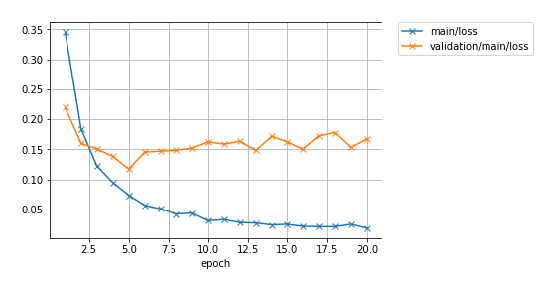

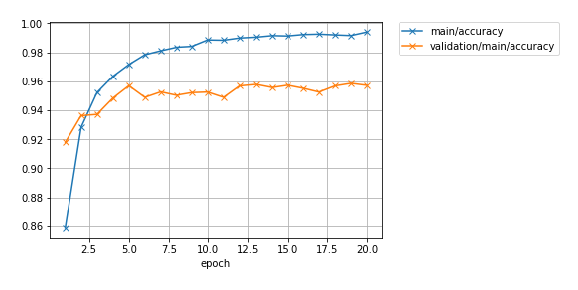

In [408]:
show_graph('result/loss.png')
show_graph('result/accuracy.png')

過学習気味

In [379]:
def predict(model, X):
    # データ数が1の場合は、バッチサイズ分の次元を追加
    if len(X.shape) == 1:  
        pred =  model.predictor(X[None, ...]).data.argmax()
    # データ数が2以上の場合はそのまま
    else:  
        pred =  model.predictor(X).data.argmax(axis=1)
    return pred

In [380]:
predict(model, X_chain_test)

array([1, 0, 0, ..., 1, 0, 0])

In [381]:
log_loss(y_chain_test, predict(model, X_chain_test))

1.480867029377188

In [382]:
from sklearn.metrics import accuracy_score

In [383]:
accuracy_score(y_chain_test, predict(model, X_chain_test))

0.957125

In [402]:
def softmax(x):
    e_x = np.exp(x - np.max(x))
    return e_x / e_x.sum()

In [465]:
def predict_rate(model, X):
    # データ数が1の場合は、バッチサイズ分の次元を追加
    if len(X.shape) == 1:  
        pred =  model.predictor(X[None, ...]).data
        return softmax(pred)
    else:
        pred =  model.predictor(X).data
        for (i, p) in enumerate(pred):
            pred[i] = softmax(p)
        return pred

In [466]:
predict_rate(model, X_chain_test[0])

array([[1.6024487e-11, 1.0000000e+00]], dtype=float32)

In [477]:
log_loss(y_chain_test, predict_rate(model, X_chain_test)[:, 1])

/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/metrics/classification.py:1694: RuntimeWarning: divide by zero encountered in log
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)
/Users/uedatomohiro/.pyenv/versions/anaconda3-5.1.0/lib/python3.6/site-packages/sklearn/metrics/classification.py:1694: RuntimeWarning: invalid value encountered in multiply
  loss = -(transformed_labels * np.log(y_pred)).sum(axis=1)


nan

In [479]:
0 in predict_rate(model, X_chain_test)[:, 1]

False

In [468]:
predict_rate(model, X_chain_test)

array([[1.6024427e-11, 1.0000000e+00],
       [1.0000000e+00, 4.6484798e-09],
       [9.9999988e-01, 1.5522227e-07],
       ...,
       [4.2773377e-07, 9.9999952e-01],
       [9.9286073e-01, 7.1392595e-03],
       [9.9970299e-01, 2.9702391e-04]], dtype=float32)

In [425]:
class MLP_2(chainer.Chain):
    def __init__(self):
        super(MLP_2, self).__init__()
        with self.init_scope():
            self.l1=L.Linear(93, 500)
            self.l2=L.Linear(500, 800)
            self.l3=L.Linear(800, 1000)
            self.l4=L.Linear(1000, 300)
            self.l5=L.Linear(300,2)
        
    def __call__(self, X):
        h = F.relu(self.l1(X))
        h = F.relu(self.l2(h))
        h = F.relu(self.l3(h))
        h = F.relu(self.l4(h))
        return self.l5(h)

In [365]:
class MLP(chainer.Chain):
    def __init__(self):
        super(MLP, self).__init__()
        with self.init_scope():
            self.l1=L.Linear(93, 500)
            self.l2=L.Linear(500, 800)
            self.l3=L.Linear(800, 300)
            self.l4=L.Linear(300, 2)
        
    def __call__(self, X):
        h1 = F.relu(self.l1(X))
        h2 = F.relu(self.l2(h1))
        h3 = F.relu(self.l3(h2))
        return self.l4(h3)

In [426]:
model_2 = L.Classifier(MLP_2())
optimizer_2 = chainer.optimizers.Adam(alpha=0.001, beta1=0.9, beta2=0.999, eps=1e-08)
optimizer_2.setup(model) 

In [427]:
train = tuple_dataset.TupleDataset(X_chain_train, y_chain_train)
train_iter = iterators.SerialIterator(train, batch_size=batch_size, shuffle=True)
updater = training.StandardUpdater(train_iter, optimizer, device=gpu)
trainer = training.Trainer(updater, (n_epoch,'epoch'), out='result')
test = tuple_dataset.TupleDataset(X_chain_test,y_chain_test)
test_iter = iterators.SerialIterator(test, batch_size=batch_size ,shuffle=False, repeat=False)
trainer.extend(extensions.Evaluator(test_iter, model))
trainer.extend(extensions.LogReport())
trainer.extend(extensions.PrintReport(['epoch', 'main/loss', 'main/accuracy', 'validation/main/loss','validation/main/accuracy']))
# trainとtestの精度のグラフを出力
trainer.extend(extensions.PlotReport(['main/accuracy', 'validation/main/accuracy'],
                          'epoch', file_name='accuracy_2.png'))
# trainとtestの損失関数のグラフを出力
trainer.extend(extensions.PlotReport(['main/loss', 'validation/main/loss'],
                          'epoch', file_name='loss_2.png'))
trainer.extend(extensions.ProgressBar())

In [428]:
trainer.run()

epoch       main/loss   main/accuracy  validation/main/loss  validation/main/accuracy
     total [..................................................]  1.56%
this epoch [###############...................................] 31.25%
       100 iter, 0 epoch / 20 epochs
       inf iters/sec. Estimated time to finish: 0:00:00.
     total [#.................................................]  3.12%
this epoch [###############################...................] 62.50%
       200 iter, 0 epoch / 20 epochs
    66.548 iters/sec. Estimated time to finish: 0:01:33.166282.
     total [##................................................]  4.69%
this epoch [##############################################....] 93.75%
       300 iter, 0 epoch / 20 epochs
    66.787 iters/sec. Estimated time to finish: 0:01:31.334604.
1           0.0118434   0.996219       0.205975              0.959125                  
     total [###...............................................]  6.25%
this epoch [############.........

     total [########################..........................] 48.44%
this epoch [##################################................] 68.75%
      3100 iter, 9 epoch / 20 epochs
    55.318 iters/sec. Estimated time to finish: 0:00:59.654597.
10          0.00740434  0.997344       0.207886              0.960625                  
     total [#########################.........................] 50.00%
this epoch [..................................................]  0.00%
      3200 iter, 10 epoch / 20 epochs
    54.563 iters/sec. Estimated time to finish: 0:00:58.647932.
     total [#########################.........................] 51.56%
this epoch [###############...................................] 31.25%
      3300 iter, 10 epoch / 20 epochs
    54.694 iters/sec. Estimated time to finish: 0:00:56.679151.
     total [##########################........................] 53.12%
this epoch [###############################...................] 62.50%
      3400 iter, 10 epoch / 20 epochs
 

19          0.00490179  0.9985         0.205714              0.961375                  
     total [###############################################...] 95.31%
this epoch [###...............................................]  6.25%
      6100 iter, 19 epoch / 20 epochs
    50.032 iters/sec. Estimated time to finish: 0:00:05.996159.
     total [################################################..] 96.88%
this epoch [##################................................] 37.50%
      6200 iter, 19 epoch / 20 epochs
    49.879 iters/sec. Estimated time to finish: 0:00:04.009688.
     total [#################################################.] 98.44%
this epoch [##################################................] 68.75%
      6300 iter, 19 epoch / 20 epochs
    49.836 iters/sec. Estimated time to finish: 0:00:02.006596.
20          0.00886765  0.9975         0.17732               0.960125                  
     total [##################################################] 100.00%
this epoch [........

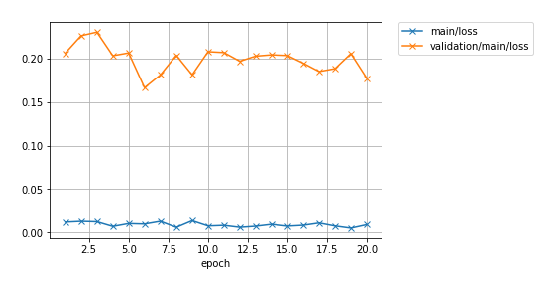

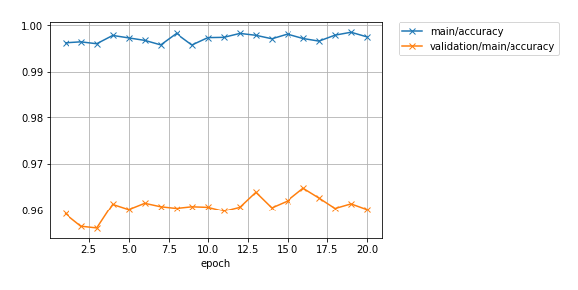

In [429]:
show_graph('result/loss_2.png')
show_graph('result/accuracy_2.png')

In [469]:
accuracy_score(y_chain_test, predict(model_2, X_chain_test))

0.489875

In [470]:
log_loss(y_chain_test, predict_rate(model_2, X_chain_test))

0.7012274702265858

In [472]:
predict_rate(model_2, X_chain_test)

array([[0.49912176, 0.5008782 ],
       [0.4825729 , 0.5174271 ],
       [0.4392135 , 0.5607865 ],
       ...,
       [0.4584091 , 0.54159087],
       [0.47420502, 0.525795  ],
       [0.49641103, 0.503589  ]], dtype=float32)

In [490]:
log_loss(y_test, (predict_rate(model, X_chain_test)[:,1] + rfr.predict(X_test)) / 2)

0.0793171740249648

In [483]:
(predict_rate(model, X_chain_test)[:,1] + rfr.predict(X_test)) / 2

array([1.00000000e+00, 2.32423991e-09, 6.75000776e-02, ...,
       9.84999762e-01, 1.13569630e-01, 8.81485120e-02])

In [491]:
log_loss(y_test, (predict_rate(model, X_chain_test)[:,1] + rfr.predict(X_test) + xgr.predict(X_test)) / 3)

0.12207629984991045

MLPとrandam forest regressorの平均にしよう

## 提出

In [583]:
test_data = pd.read_csv('test.csv')

In [584]:
first_pokemon_test = pd.DataFrame(columns=pokemon.columns)
second_pokemon_test = pd.DataFrame(columns=pokemon.columns)
for d in test_data.values:
    first_pokemon_test = first_pokemon_test.append(pokemon.iloc[d[1]-1,:])
    second_pokemon_test = second_pokemon_test.append(pokemon.iloc[d[2]-1,:])

In [585]:
first_pokemon_test.columns = 'first_' + first_pokemon_test.columns
second_pokemon_test.columns = 'second_' + second_pokemon_test.columns

In [586]:
X_submit = pd.concat([test_data, first_pokemon_test.reset_index(drop=True), second_pokemon_test.reset_index(drop=True)], axis=1)

In [587]:
X_submit.iloc[0,:]

id                               0
First_pokemon                   85
Second_pokemon                 602
first_#                         85
first_Name                Rapidash
first_Type 1                  Fire
first_Type 2                   NaN
first_HP                        65
first_Attack                   100
first_Defense                   70
first_Sp. Atk                   80
first_Sp. Def                   80
first_Speed                    105
first_Generation                 1
first_Legendary              False
first_type_1_Bug                 0
first_type_1_Dark                0
first_type_1_Dragon              0
first_type_1_Electric            0
first_type_1_Fairy               0
first_type_1_Fighting            0
first_type_1_Fire                1
first_type_1_Flying              0
first_type_1_Ghost               0
first_type_1_Grass               0
first_type_1_Ground              0
first_type_1_Ice                 0
first_type_1_Normal              0
first_type_1_Poison 

In [588]:
X_submit = X_submit.drop('first_Type 1', axis=1).drop('first_Type 2', axis=1).drop('second_Type 1', axis=1).drop('second_Type 2', axis=1)

In [589]:
X_submit['first_Legendary'] = X_submit['first_Legendary'].map({False: 0, True: 1})
X_submit['second_Legendary'] = X_submit['second_Legendary'].map({False: 0, True: 1})

In [590]:
X_submit = X_submit.drop('first_Name', axis=1).drop('second_Name', axis=1)

In [591]:
X_submit

,id,First_pokemon,Second_pokemon,first_#,first_HP,first_Attack,first_Defense,first_Sp. Atk,first_Sp. Def,first_Speed,...,second_type_2_Ghost,second_type_2_Grass,second_type_2_Ground,second_type_2_Ice,second_type_2_Normal,second_type_2_Poison,second_type_2_Psychic,second_type_2_Rock,second_type_2_Steel,second_type_2_Water
0,0,85,602,85,65,100,70,80,80,105,...,0,1,0,0,0,0,0,0,0,0
1,1,536,155,536,50,65,107,105,107,86,...,0,0,0,0,0,0,0,0,0,0
2,2,189,644,189,90,30,15,40,20,15,...,0,0,0,0,0,0,0,0,0,0
3,3,526,166,526,85,80,70,135,75,90,...,0,0,0,0,0,0,0,0,0,0
4,4,690,772,690,100,123,75,57,75,80,...,0,0,0,0,0,0,0,0,0,0
5,5,764,17,764,71,73,88,120,89,59,...,0,0,0,0,0,1,0,0,0,0
6,6,103,175,103,60,65,80,170,95,130,...,0,0,0,0,0,0,0,0,0,0
7,7,212,392,212,65,65,60,130,95,110,...,0,0,0,0,0,0,0,0,0,0
8,8,34,682,34,75,100,110,45,55,65,...,0,0,0,0,0,0,0,0,0,0
9,9,470,422,470,76,48,48,57,62,34,...,0,0,0,0,0,0,0,0,0,0


In [592]:
X_submit_std = scaler.transform(X_submit)

In [593]:
X_submit_std = StandardScaler().fit_transform(X_submit)

In [596]:
rfr_submit = RandomForestRegressor(n_estimators=1000)
rfr_submit.fit(X_std, y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=1000, n_jobs=1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [597]:
model_submit = L.Classifier(MLP())
optimizer_submit = chainer.optimizers.Adam(alpha=0.001, beta1=0.9, beta2=0.999, eps=1e-08)
optimizer_submit.setup(model_submit) 

In [598]:
train = tuple_dataset.TupleDataset(X_chain, y_chain)
train_iter = iterators.SerialIterator(train, batch_size=batch_size, shuffle=True)
updater = training.StandardUpdater(train_iter, optimizer_submit, device=gpu)
trainer_submit = training.Trainer(updater, (n_epoch,'epoch'), out='result')
trainer_submit.extend(extensions.ProgressBar())

In [599]:
trainer_submit.run()

     total [..................................................]  1.25%
this epoch [############......................................] 25.00%
       100 iter, 0 epoch / 20 epochs
       inf iters/sec. Estimated time to finish: 0:00:00.
     total [#.................................................]  2.50%
this epoch [#########################.........................] 50.00%
       200 iter, 0 epoch / 20 epochs
     84.37 iters/sec. Estimated time to finish: 0:01:32.450043.
     total [#.................................................]  3.75%
this epoch [#####################################.............] 75.00%
       300 iter, 0 epoch / 20 epochs
    84.604 iters/sec. Estimated time to finish: 0:01:31.012378.
     total [##................................................]  5.00%
this epoch [..................................................]  0.00%
       400 iter, 1 epoch / 20 epochs
    85.131 iters/sec. Estimated time to finish: 0:01:29.274586.
     total [###....................

     total [#####################.............................] 42.50%
this epoch [#########################.........................] 50.00%
      3400 iter, 8 epoch / 20 epochs
    62.106 iters/sec. Estimated time to finish: 0:01:14.066809.
     total [#####################.............................] 43.75%
this epoch [#####################################.............] 75.00%
      3500 iter, 8 epoch / 20 epochs
    61.598 iters/sec. Estimated time to finish: 0:01:13.054568.
     total [######################............................] 45.00%
this epoch [..................................................]  0.00%
      3600 iter, 9 epoch / 20 epochs
    61.195 iters/sec. Estimated time to finish: 0:01:11.900748.
     total [#######################...........................] 46.25%
this epoch [############......................................] 25.00%
      3700 iter, 9 epoch / 20 epochs
    60.891 iters/sec. Estimated time to finish: 0:01:10.617427.
     total [################

     total [#########################################.........] 83.75%
this epoch [#####################################.............] 75.00%
      6700 iter, 16 epoch / 20 epochs
    54.762 iters/sec. Estimated time to finish: 0:00:23.739084.
     total [##########################################........] 85.00%
this epoch [..................................................]  0.00%
      6800 iter, 17 epoch / 20 epochs
    54.712 iters/sec. Estimated time to finish: 0:00:21.932893.
     total [###########################################.......] 86.25%
this epoch [############......................................] 25.00%
      6900 iter, 17 epoch / 20 epochs
    54.432 iters/sec. Estimated time to finish: 0:00:20.208741.
     total [###########################################.......] 87.50%
this epoch [#########################.........................] 50.00%
      7000 iter, 17 epoch / 20 epochs
    54.172 iters/sec. Estimated time to finish: 0:00:18.459635.
     total [############

In [600]:
X_submit_chain = X_submit_std.astype(xp.float32)

In [604]:
submit = (predict_rate(model_submit, X_submit_chain)[:,1] + rfr_submit.predict(X_submit_std)) / 2

first_pokemonが勝利する確率にする

In [605]:
submit

array([0.006     , 0.991     , 0.97399976, ..., 0.02750003, 0.93099791,
       0.87099315])

In [607]:
winner.head()

,winner
0,1
1,0
2,0
3,0
4,1


In [608]:
data.head()

,id,First_pokemon,Second_pokemon,Winner
0,0,88,85,85
1,1,466,408,466
2,2,715,120,715
3,3,467,377,467
4,4,416,206,206


In [611]:
rfr.predict(X_test)[:5]

array([1.   , 0.   , 0.135, 0.712, 0.993])

In [612]:
1 - rfr.predict(X_test)[:5]

array([0.   , 1.   , 0.865, 0.288, 0.007])

In [613]:
submit = 1 - submit

In [614]:
submit_csv = pd.DataFrame(submit)

In [619]:
submit_csv.columns = ['probability']

In [618]:
submit_csv.to_csv('submit_ueda.csv')

In [ ]:
import pickle


# Pythonオブジェクトをpickleファイルとして保存
with open('model.pickle','wb') as f:
    pickle.dump(model, f) # (Pythonオブジェクト, pickleファイル)

    # Pythonオブジェクトをpickleファイルとして保存
with open('model_2.pickle','wb') as f:
    pickle.dump(model, f) # (Pythonオブジェクト, pickleファイル)
